In [5]:
import torch

In [6]:
# 📌 Test pour InputEmbedding
from model import Input_Embeddings

# Jouet de données
vocab_size = 10 # vocab ds mon corpus
d_model = 512
input_tokens = torch.tensor([[1, 2, 3, 4, 0]]) #phrase de 5 mots 

# Initialisation de l'embedding
embed_layer = Input_Embeddings(vocab_size=vocab_size, d_model=d_model)
embed_out = embed_layer(input_tokens)

# Vérification forme
print("Shape embeddings :", embed_out.shape)
assert embed_out.shape == (1, 5, d_model)


Shape embeddings : torch.Size([1, 5, 512])


In [7]:
embed_layer.forward(input_tokens)

tensor([[[ -5.2629,  12.8266,  14.3437,  ...,  23.0629,  10.6264,  52.6519],
         [-25.2713,  55.3024,  30.0786,  ..., -34.5688,   5.0842, -18.4921],
         [-17.4620,   2.7323,  -5.8899,  ...,  21.4719, -52.9694, -40.1232],
         [  6.0520, -14.9309,  -5.6713,  ..., -11.4957,  23.3249,  20.8661],
         [  3.9342, -21.2138,  16.6666,  ...,   4.2767, -12.8261,  20.1042]]],
       grad_fn=<MulBackward0>)

In [8]:
embed_out

tensor([[[ -5.2629,  12.8266,  14.3437,  ...,  23.0629,  10.6264,  52.6519],
         [-25.2713,  55.3024,  30.0786,  ..., -34.5688,   5.0842, -18.4921],
         [-17.4620,   2.7323,  -5.8899,  ...,  21.4719, -52.9694, -40.1232],
         [  6.0520, -14.9309,  -5.6713,  ..., -11.4957,  23.3249,  20.8661],
         [  3.9342, -21.2138,  16.6666,  ...,   4.2767, -12.8261,  20.1042]]],
       grad_fn=<MulBackward0>)

In [9]:
import numpy as np
print(np.__version__)


2.2.4


/Users/marwaneaitmouloud/Projects/transformer_from_scratch/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


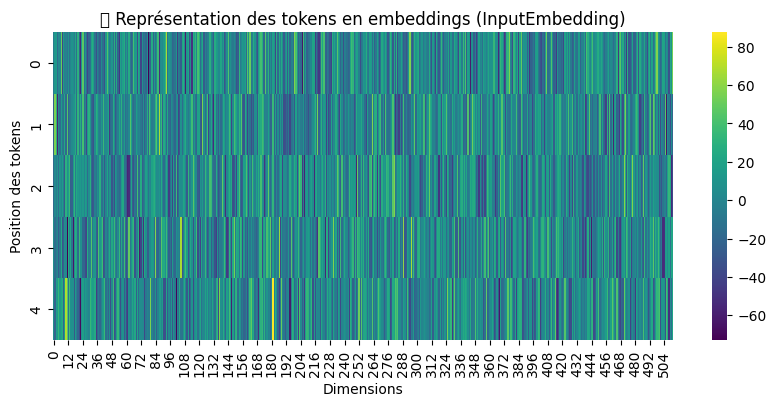

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Affichons les embeddings de chaque token
plt.figure(figsize=(10, 4))
sns.heatmap(embed_out[0].detach().numpy(), annot=False, cmap="viridis")
plt.title("🎨 Représentation des tokens en embeddings (InputEmbedding)")
plt.xlabel("Dimensions")
plt.ylabel("Position des tokens")
plt.show()


In [11]:
from model import Positional_encoder


# Params
vocab_size = 20 # 20 mots dans ton vocab
d_model = 16 # Nombre de param par mots 
max_len = 50 # nombre max de mots ds la phras e
seq_len = 10 
dropout=0.1

# Dummy tokens
input_tokens = torch.randint(0, vocab_size, (1, seq_len))

# Layers
embedding_layer = Input_Embeddings(vocab_size, d_model)
pos_encoder = Positional_encoder(d_model, max_len,dropout)

# Forward
embed = embedding_layer(input_tokens)            # (1, seq_len, d_model)
print(embed)
print(embedding_layer)
encoded = pos_encoder(embed)                     # (1, seq_len, d_model)

print("Shape après positional encoding :", encoded.shape)


tensor([[[-6.2954, -4.7084,  2.3877, -3.7569, -5.1730,  3.7686, -5.6416,
          -0.8037,  1.4276,  6.5997, -5.5964,  1.0759,  1.3199,  8.3597,
          -0.6711,  1.2151],
         [-9.8885, -2.3508, -3.1015, -5.7697, -1.0150, -5.3737, -3.5252,
           9.3539,  2.5732, -2.3667, -4.7089, -4.4691, -3.7069,  6.1768,
           0.4660, -2.9189],
         [ 3.1363, -1.2134, -2.9787,  5.7898,  0.9846,  0.1015,  3.2167,
          -3.9419, -9.1998, -2.0347, -0.0297, -1.9217,  1.3173,  1.9884,
          -1.7790, -1.3515],
         [-7.1923,  4.7230, -3.4011, -2.1431,  6.7302,  1.1158, -4.5728,
          10.5625,  3.5730,  1.6885,  0.5928, -4.9050, -2.9284,  2.6727,
           2.3797,  0.4805],
         [ 3.3510, -0.3530, -2.8021, -2.7256, -1.6817, -5.2881, -8.7817,
          -4.4588, -4.8735, -2.7315,  1.9032, -0.8943,  0.0246, -4.1772,
           2.0531,  0.2668],
         [ 3.3510, -0.3530, -2.8021, -2.7256, -1.6817, -5.2881, -8.7817,
          -4.4588, -4.8735, -2.7315,  1.9032, -0.894

In [12]:
input_tokens

tensor([[11, 19,  4,  2, 16, 16, 14, 19, 15, 16]])

In [13]:
encoded.shape

torch.Size([1, 10, 16])

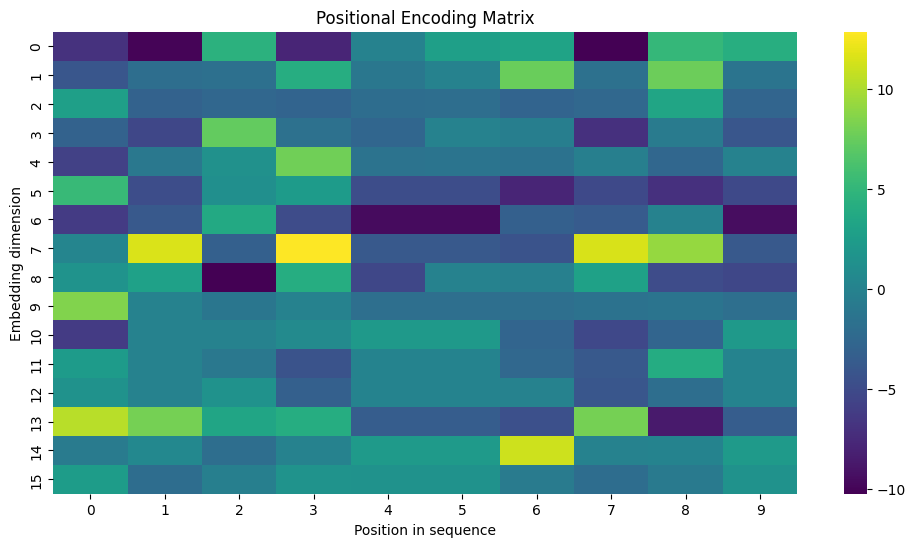

In [14]:
encoded = encoded.squeeze(0)  # Enlève la première dimension (batch)

plt.figure(figsize=(12, 6))
sns.heatmap(encoded.detach().numpy().T, cmap="viridis", cbar=True)
plt.xlabel("Position in sequence")
plt.ylabel("Embedding dimension")
plt.title("Positional Encoding Matrix")
plt.show()

/Users/marwaneaitmouloud/Projects/transformer_from_scratch/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


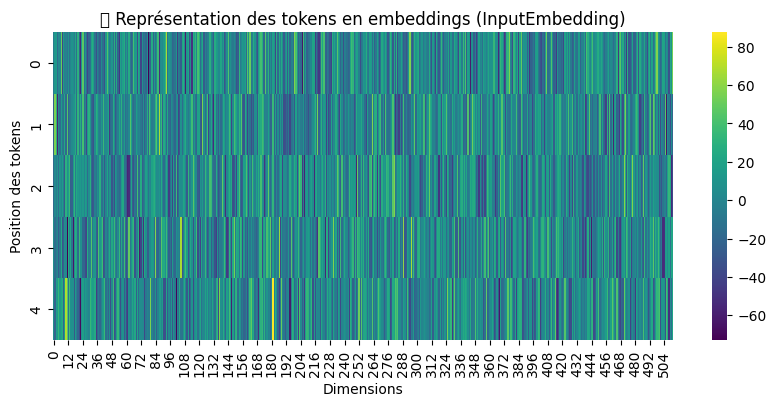

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


# Affichons les embeddings de chaque token
plt.figure(figsize=(10, 4))
sns.heatmap(embed_out[0].detach().numpy(), annot=False, cmap="viridis")
plt.title("🎨 Représentation des tokens en embeddings (InputEmbedding)")
plt.xlabel("Dimensions")
plt.ylabel("Position des tokens")
plt.show()


La on peut voir le process standard de batch normalization d'un modèle de ML qui permet de diminuer par exemple l'overfitting par l'ajout de bruit qui introduit une legere regularization.
Permet d'améliorer la convergence 
Affiner Covariate shift et effet sur transformers

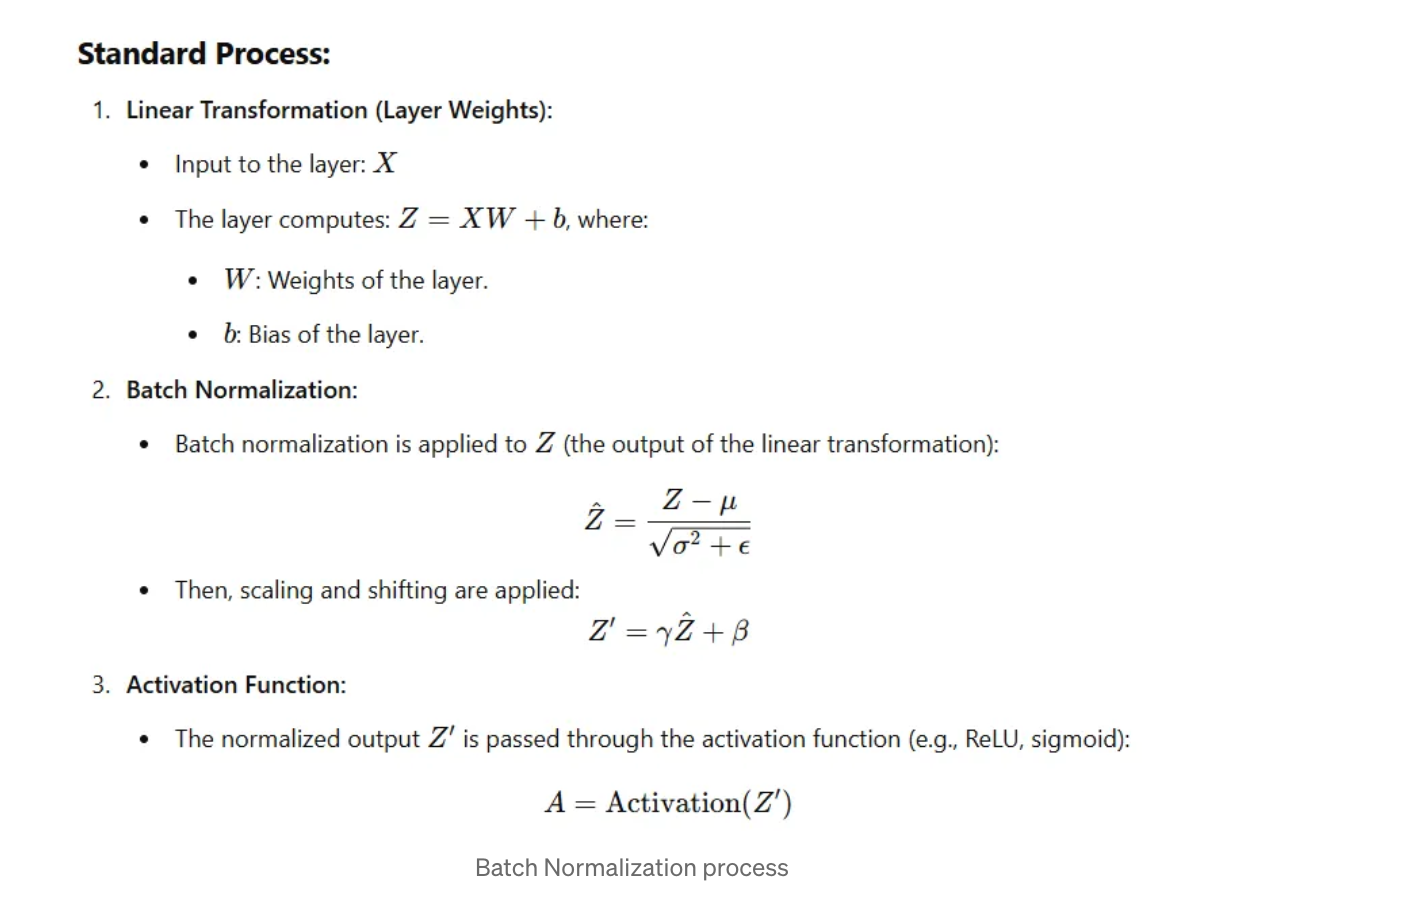

Le Layer Normalization est different du Batch comme on va le voir 

In batch normalization, we normalize across the batch, that is we find mean, and standard deviation across the entire column,
In layer normalization, we normalize across the features, that is we find mean and standard deviation across that entire row
https://towardsdatascience.com/batch-norm-explained-visually-how-it-works-and-why-neural-networks-need-it-b18919692739/

Montrer comment les données peuvent etre normalisées entre batch et layer

In [16]:
from model import Layer_Normalization
torch.manual_seed(42)

# Paramètres
seq_len = 10
embed_dim = 16

# Données d'entrée simulées (1 séquence, 10 tokens, 16 dimensions)
x = torch.randn((1, seq_len, embed_dim)) * 10 + 5  # volontairement très décentré
layer_norm=Layer_Normalization(embed_dim)
x_norm=layer_norm(x)

In [23]:
print("Avant normalisation :")
print(f"Mean = {x.mean(dim=-1)}")
print(f"Std = {x.std(dim=-1)}")

print("\nAprès normalisation :")
print(f"Mean = {x_norm.mean(dim=-1)}")
print(f"Std = {x_norm.std(dim=-1)}")


Avant normalisation :
Mean = tensor([[ 3.6327, 10.7286,  2.3417,  4.6100,  7.0163,  4.4279,  6.8852,  6.8537,
          7.4966,  6.0380]])
Std = tensor([[12.3437,  7.9352, 10.9438,  9.5039, 10.6247,  8.9400,  8.6623,  6.2171,
         10.9713, 11.3571]])

Après normalisation :
Mean = tensor([[ 2.2352e-08,  7.4506e-09,  3.7253e-09,  0.0000e+00,  2.7940e-08,
         -3.7253e-09,  0.0000e+00,  7.4506e-09, -4.6566e-09,  1.4901e-08]],
       grad_fn=<MeanBackward1>)
Std = tensor([[0.4355, 0.3315, 0.4062, 0.3726, 0.3991, 0.3585, 0.3512, 0.2798, 0.4068,
         0.4151]], grad_fn=<StdBackward0>)


Avant Normalisation : les valeurs sont très dispersées (tons rouges et bleus mélangés)
Après Normalisation : beaucoup plus uniforme (autour de zéro), mais avec variations selon alpha/bias

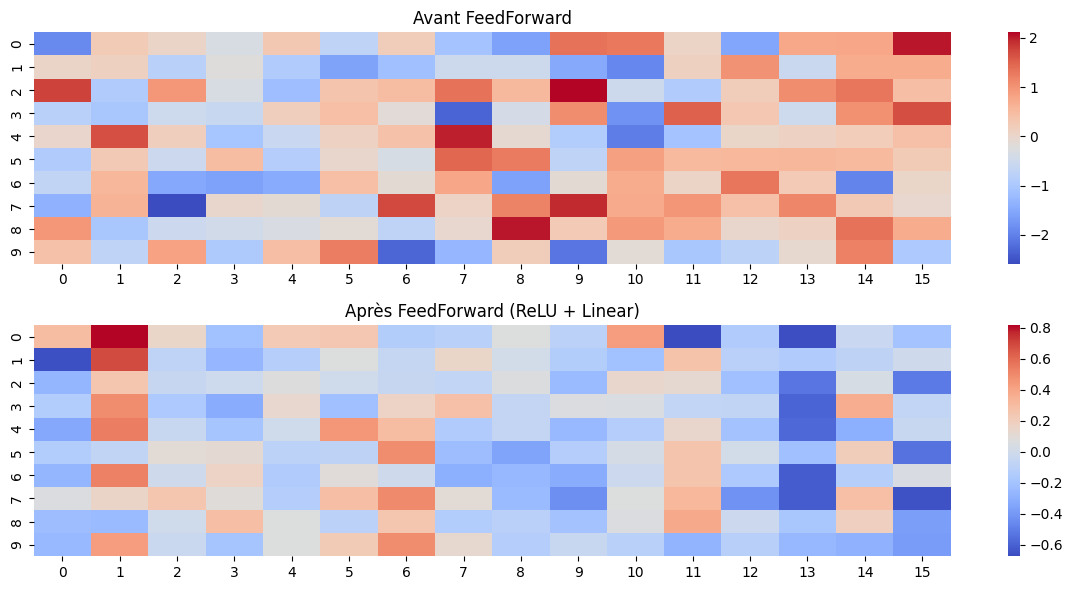

In [24]:
from model import Feed_forward
seq_len = 10
embed_dim = 16
batch_size = 1
# Entrée random simulée (batch, seq_len, embed_dim)
x = torch.randn(batch_size, seq_len, embed_dim)
d_model = 16       # dimension d’entrée/sortie (comme embed_dim)
dff = 64           # dimension cachée (4×d_model en général)
dropout = 0.1

ffn = Feed_forward(d_model, dff, dropout)

# Sortie
x_ffn = ffn(x)

# Heatmap
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

sns.heatmap(x[0].detach().numpy(), cmap="coolwarm", ax=axs[0])
axs[0].set_title("Avant FeedForward")

sns.heatmap(x_ffn[0].detach().numpy(), cmap="coolwarm", ax=axs[1])
axs[1].set_title("Après FeedForward (ReLU + Linear)")

plt.tight_layout()
plt.show()

Avant : les valeurs sont très variables et centrées autour de 0.
Après : la non-linéarité (ReLU) casse la symétrie, introduit des zéros → la heatmap est modifiée, et les motifs sont plus nets.

In [25]:
embed_dim = 16
num_heads = 4
seq_len = 10
batch_size = 1
dropout=0.5
mask=None
from model import MultiHeadAttentionBlock
x = torch.randn(batch_size, seq_len, embed_dim)

mha = MultiHeadAttentionBlock(embed_dim, num_heads,dropout)
output, attn_weights = mha.attention(x,x,x,mask,dropout=None)
output2=mha(x,x,x,mask)

print("Output shape :", output.shape)         # (1, 10, 16)
print("Attention shape :", attn_weights.shape)  # (1, 4, 10, 10)
print(output2.shape)


Output shape : torch.Size([1, 10, 16])
Attention shape : torch.Size([1, 10, 10])
torch.Size([1, 10, 16])


Fail sur le nombre de heads 

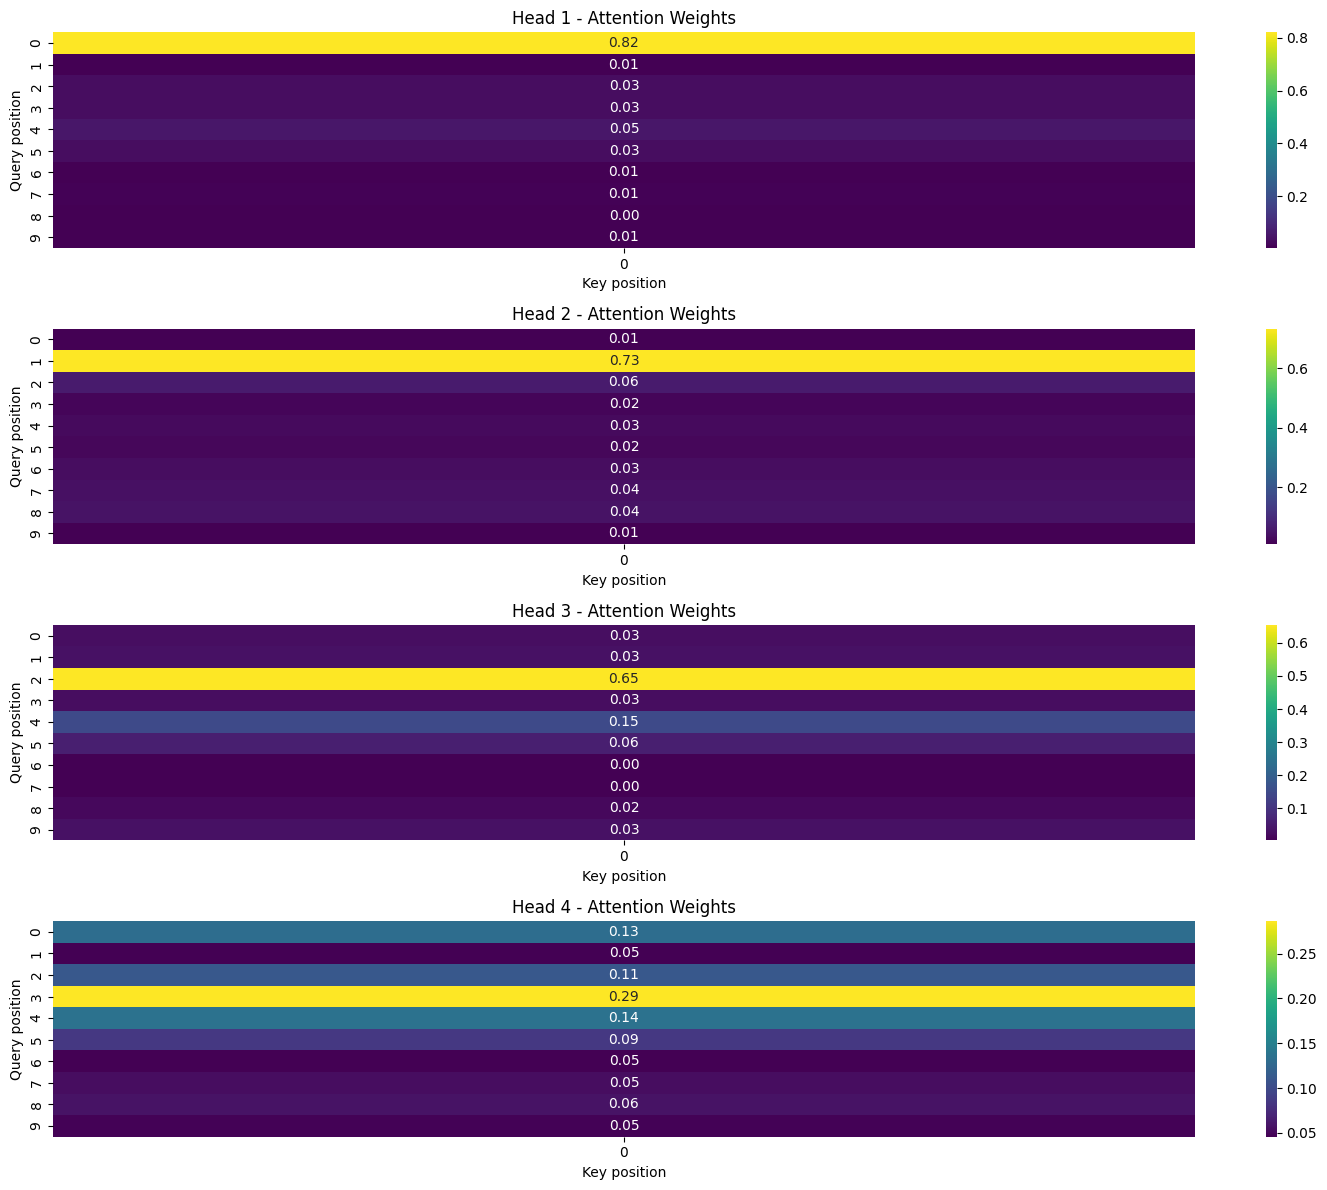

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_attention_weights(attn_weights, seq_len):
    num_heads = 4

    plt.figure(figsize=(15, 3 * num_heads))
    for h in range(num_heads):
        plt.subplot(num_heads, 1, h + 1)
        sns.heatmap(attn_weights[0, h].detach().unsqueeze(1).numpy(), cmap="viridis", annot=True, fmt=".2f")# ne pas oublier le unsqueeze pr rajouter une dimension au tensor ce qui est indispensable 
        plt.title(f"Head {h + 1} - Attention Weights")
        plt.xlabel("Key position")
        plt.ylabel("Query position")
    plt.tight_layout()
    plt.show()

plot_attention_weights(attn_weights, seq_len)


In [ ]:
attn_weights[0, 4].detach().numpy()

array([0.03556787, 0.0935078 , 0.0171308 , 0.01185379, 0.6058154 ,
       0.0228381 , 0.02979258, 0.12083595, 0.00583202, 0.05682567],
      dtype=float32)

In [ ]:
attn_weights.shape[1]

10